In [1]:
import requests
import os

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Directory where you want to save the dataset
save_dir = "datasets"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Filename to save the dataset as
filename = os.path.join(save_dir, "adult.data")

# Send a GET request to the URL to download the dataset
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the dataset to a file
    with open(filename, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print("Failed to download dataset.")


Dataset downloaded successfully.


In [2]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv("datasets/adult.data", header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Define the appropriate titles for the columns
column_titles = {
    0: "Age",
    1: "Workclass",
    2: "Final Weight",
    3: "Education",
    4: "Education Number",
    5: "Marital Status",
    6: "Occupation",
    7: "Relationship",
    8: "Race",
    9: "Sex",
    10: "Capital Gain",
    11: "Capital Loss",
    12: "Hours per Week",
    13: "Native Country",
    14: "Income"
}

# Rename the columns
data.rename(columns=column_titles, inplace=True)

# Display the first few rows with the new column names
data.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Workclass         32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Native Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()

Age                 0
Workclass           0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per Week      0
Native Country      0
Income              0
dtype: int64

In [6]:
data.describe()

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.value_counts()

Age  Workclass         Final Weight  Education     Education Number  Marital Status      Occupation         Relationship   Race   Sex     Capital Gain  Capital Loss  Hours per Week  Native Country  Income
25   Private           195994        1st-4th       2                 Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
23   Private           240137        5th-6th       3                 Never-married       Handlers-cleaners  Not-in-family  White  Male    0             0             55              Mexico          <=50K     2
38   Private           207202        HS-grad       9                 Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             48              United-States   >50K      2
30   Private           144593        HS-grad       9                 Never-married       Other-service      Not-in-family  Black  Male    0             0            

In [8]:
# Get unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Display unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()

Unique values for column 'Age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'Workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'Final Weight':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'Education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'Education Number':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'Marital Status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'

In [9]:
# Count the occurrences of "?" in each column
missing_counts = (data == " ?").sum()

# Display the counts of "?" for each column
print("Counts of '?' for each column:")
print(missing_counts)

Counts of '?' for each column:
Age                    0
Workclass           1836
Final Weight           0
Education              0
Education Number       0
Marital Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital Gain           0
Capital Loss           0
Hours per Week         0
Native Country       583
Income                 0
dtype: int64


In [10]:
data.shape

(32561, 15)

In [11]:
import numpy as np

In [12]:
# Replace "?" with NaN
data.replace(" ?", np.nan, inplace=True)

# Impute missing values using mode imputation for categorical columns
categorical_columns = ['Workclass', 'Occupation', 'Native Country']
for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Check if there are any remaining missing values
missing_counts_after_imputation = data.isnull().sum()

# Display the counts of missing values after imputation
print("Counts of missing values after imputation:")
print(missing_counts_after_imputation)

Counts of missing values after imputation:
Age                 0
Workclass           0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per Week      0
Native Country      0
Income              0
dtype: int64


C:\Users\rxp583\AppData\Local\Temp\ipykernel_11432\86003575.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


In [13]:
data.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Univariant Analysis

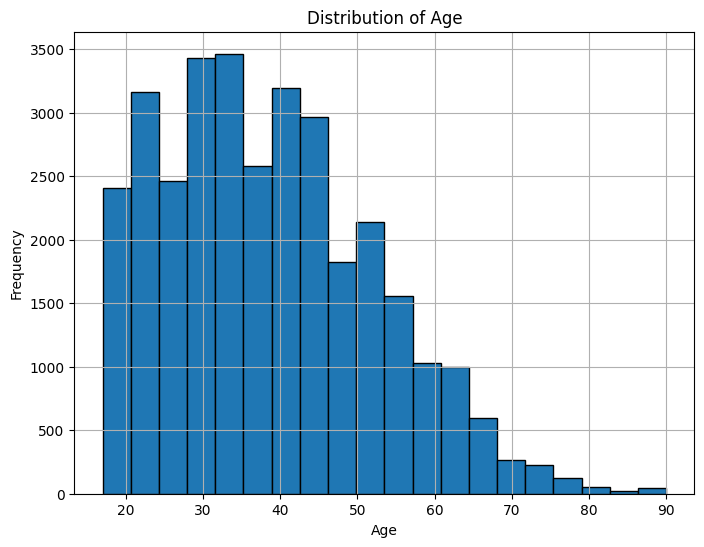

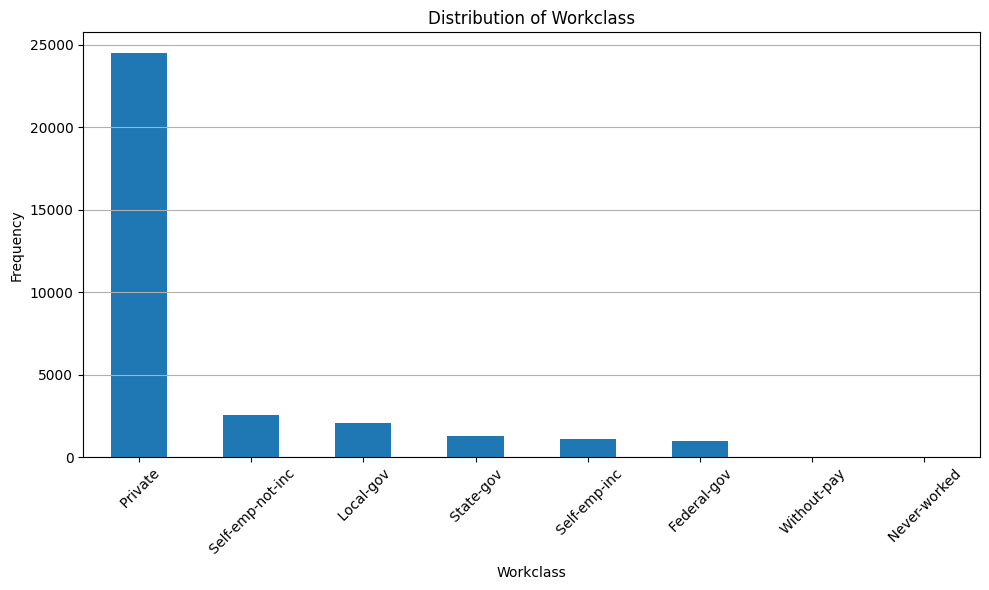

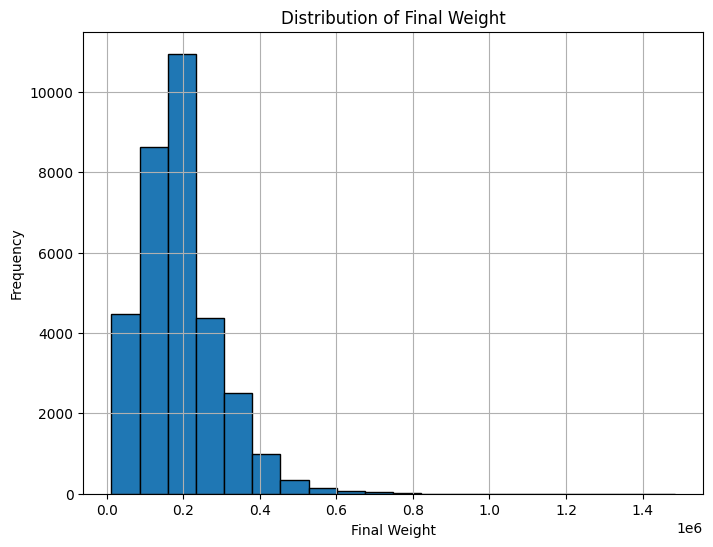

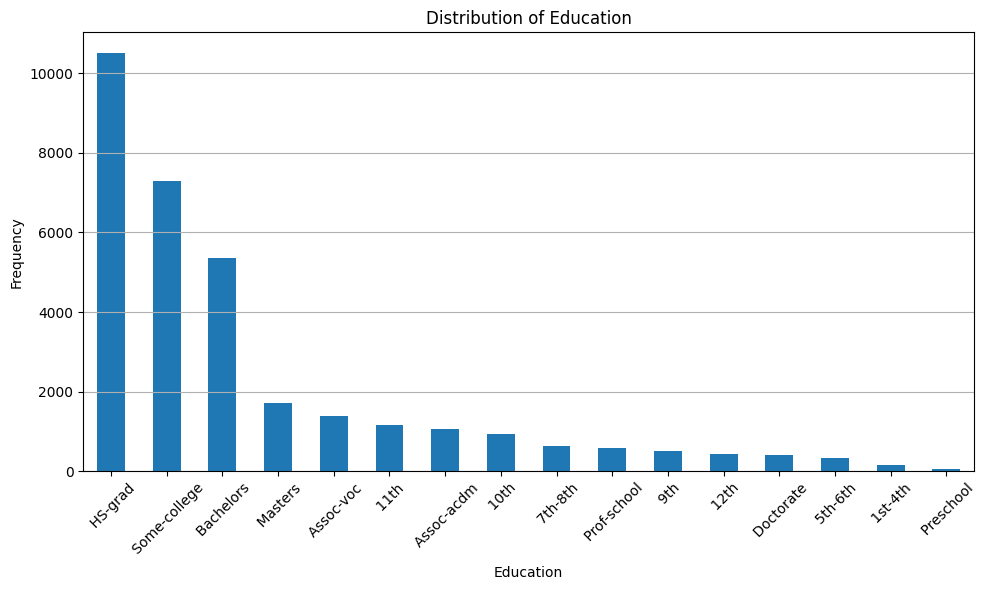

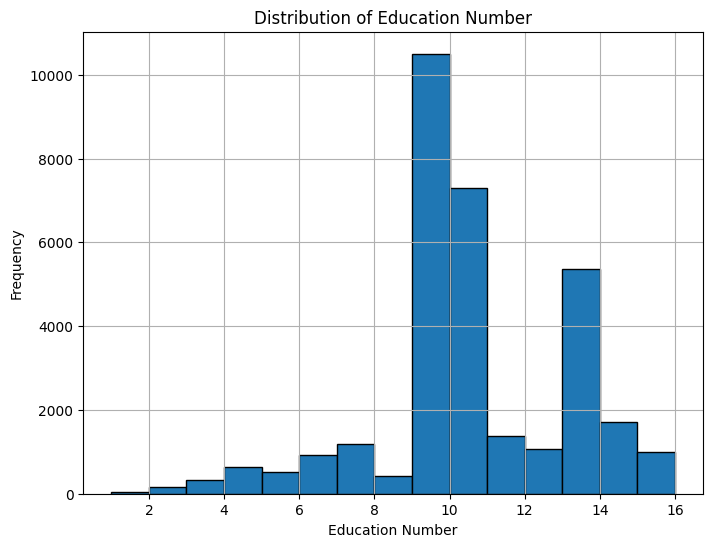

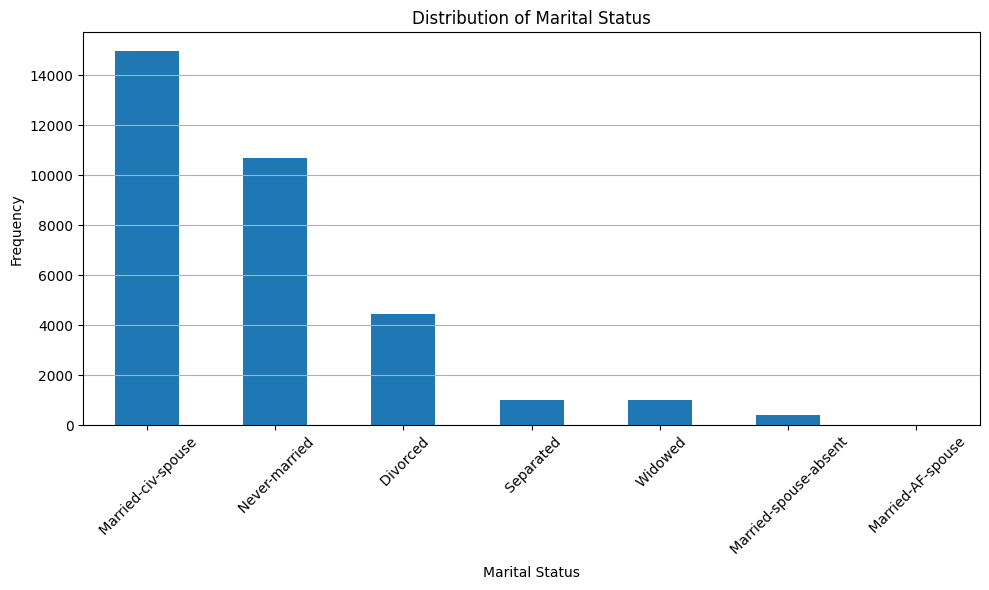

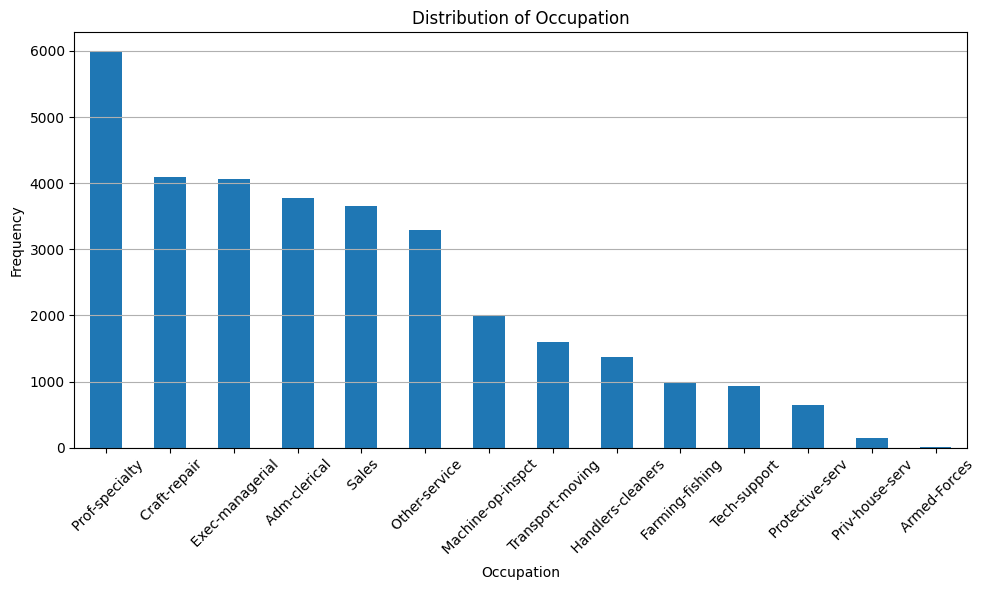

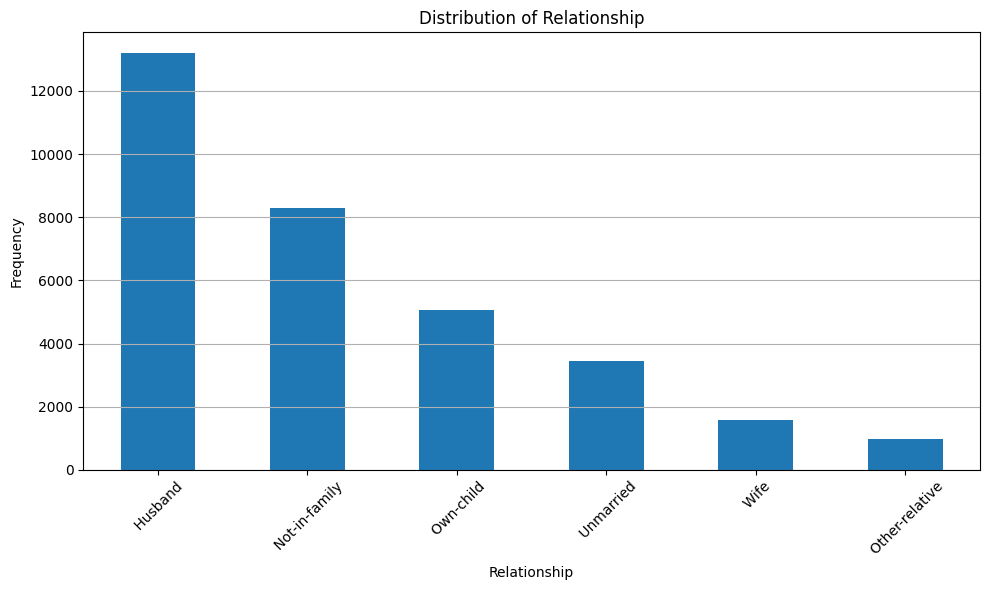

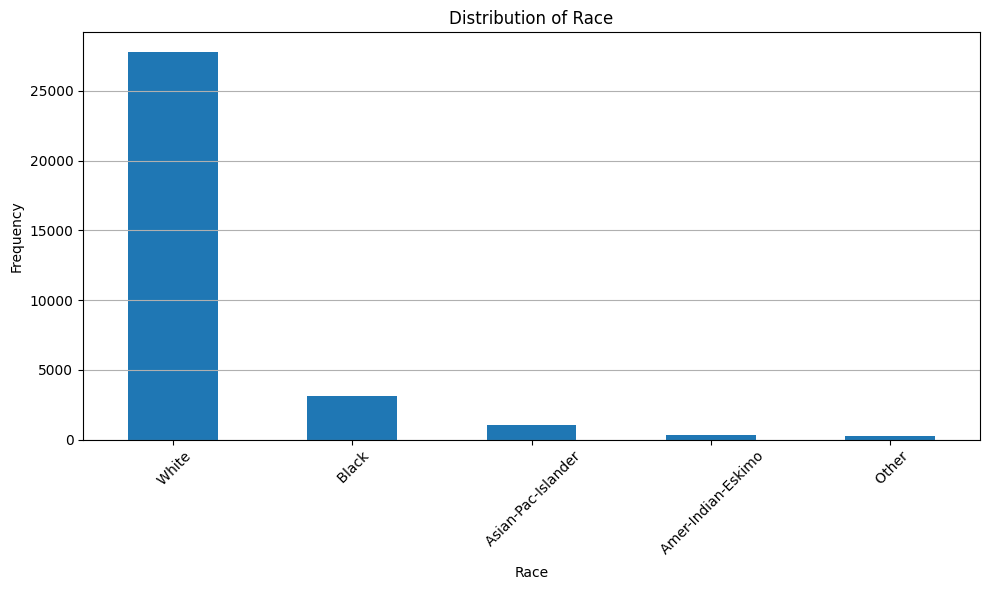

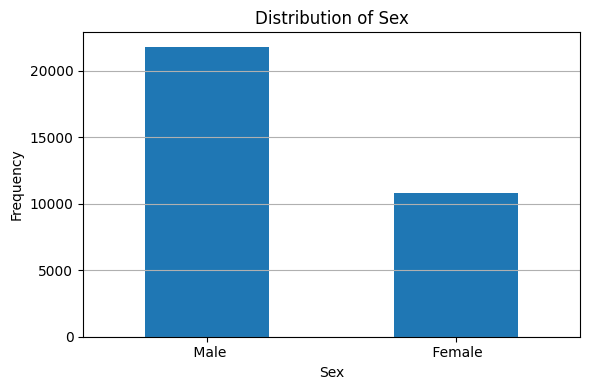

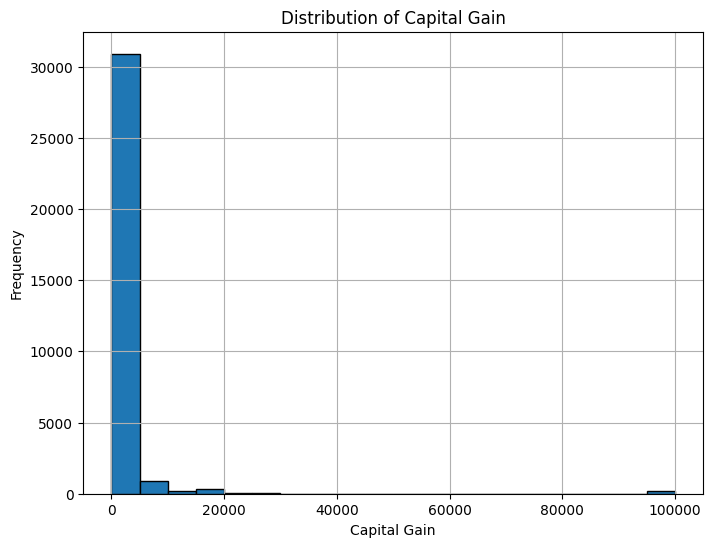

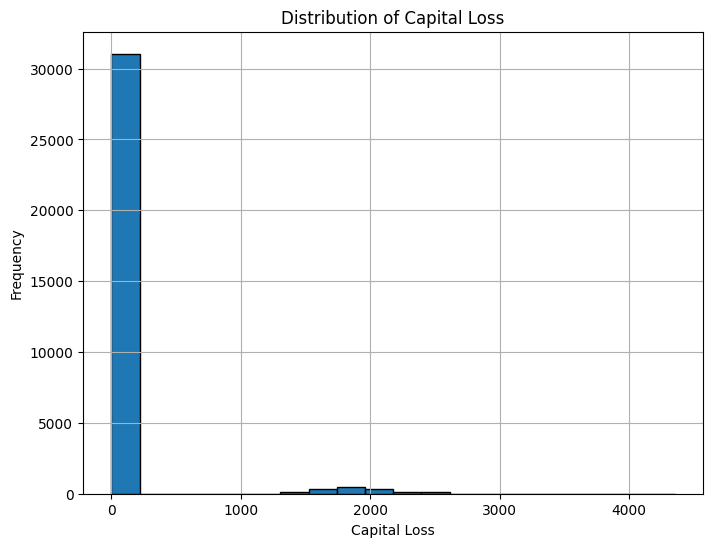

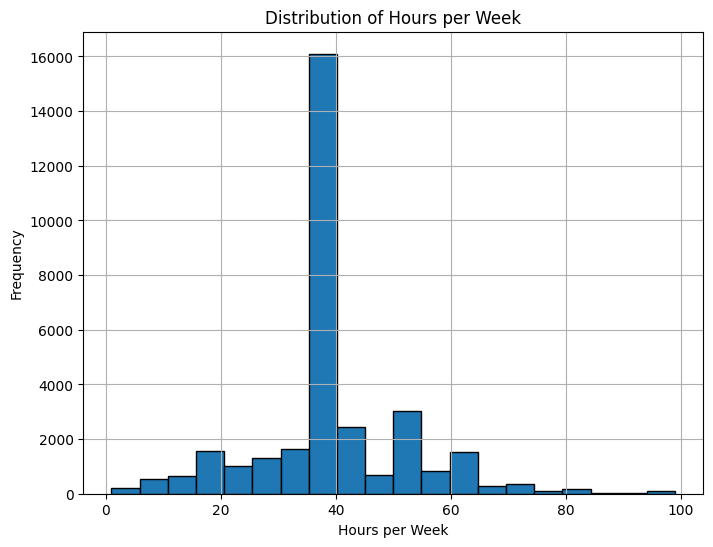

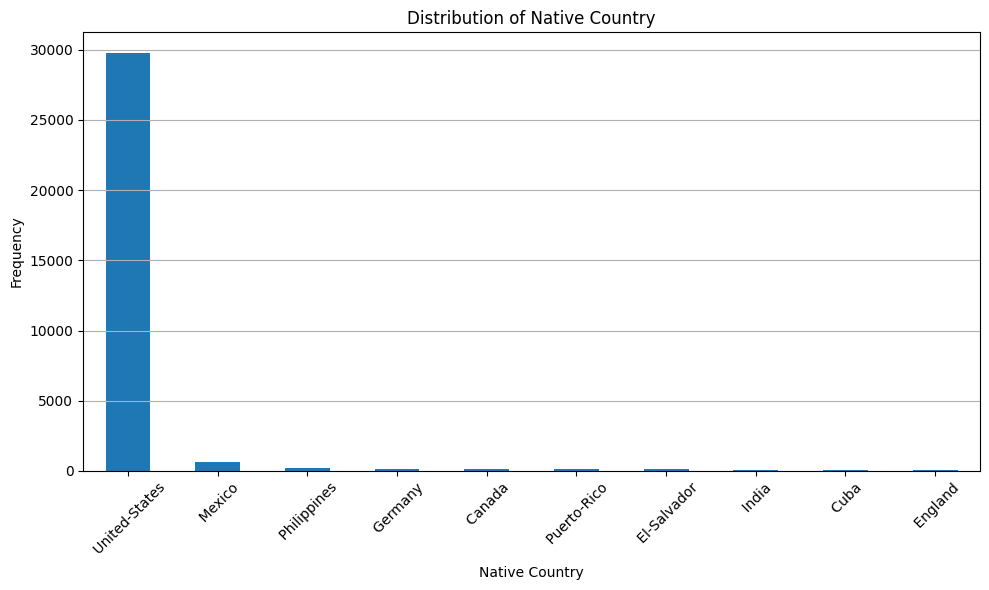

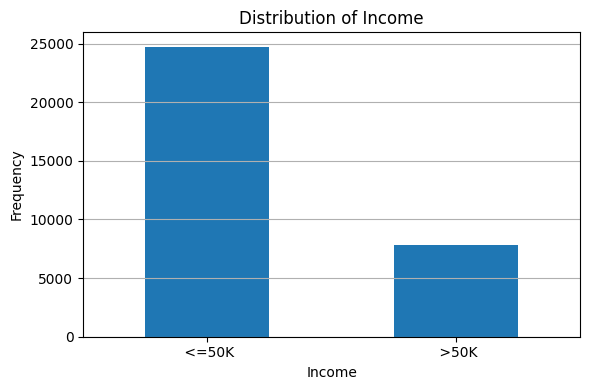

In [17]:
# Example code for Age
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

# Example code for Workclass
plt.figure(figsize=(10, 6))
workclass_counts = data['Workclass'].value_counts()
workclass_counts.plot(kind='bar')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.title('Distribution of Workclass')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Final Weight (fnlwgt)
plt.figure(figsize=(8, 6))
plt.hist(data['Final Weight'], bins=20, edgecolor='black')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Final Weight')
plt.grid(True)
plt.show()

# Example code for Education
plt.figure(figsize=(10, 6))
education_counts = data['Education'].value_counts()
education_counts.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Education Number
plt.figure(figsize=(8, 6))
plt.hist(data['Education Number'], bins=15, edgecolor='black')
plt.xlabel('Education Number')
plt.ylabel('Frequency')
plt.title('Distribution of Education Number')
plt.grid(True)
plt.show()

# Example code for Marital Status
plt.figure(figsize=(10, 6))
marital_counts = data['Marital Status'].value_counts()
marital_counts.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Occupation
plt.figure(figsize=(10, 6))
occupation_counts = data['Occupation'].value_counts()
occupation_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Relationship
plt.figure(figsize=(10, 6))
relationship_counts = data['Relationship'].value_counts()
relationship_counts.plot(kind='bar')
plt.xlabel('Relationship')
plt.ylabel('Frequency')
plt.title('Distribution of Relationship')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Race
plt.figure(figsize=(10, 6))
race_counts = data['Race'].value_counts()
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Distribution of Race')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Sex
plt.figure(figsize=(6, 4))
sex_counts = data['Sex'].value_counts()
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Capital Gain
plt.figure(figsize=(8, 6))
plt.hist(data['Capital Gain'], bins=20, edgecolor='black')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.title('Distribution of Capital Gain')
plt.grid(True)
plt.show()

# Example code for Capital Loss
plt.figure(figsize=(8, 6))
plt.hist(data['Capital Loss'], bins=20, edgecolor='black')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Capital Loss')
plt.grid(True)
plt.show()

# Example code for Hours per Week
plt.figure(figsize=(8, 6))
plt.hist(data['Hours per Week'], bins=20, edgecolor='black')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per Week')
plt.grid(True)
plt.show()

# Example code for Native Country (showing top 10 countries)
plt.figure(figsize=(10, 6))
native_counts = data['Native Country'].value_counts().head(10)
native_counts.plot(kind='bar')
plt.xlabel('Native Country')
plt.ylabel('Frequency')
plt.title('Distribution of Native Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Example code for Income
plt.figure(figsize=(6, 4))
income_counts = data['Income'].value_counts()
income_counts.plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Bi-Variant Analysis

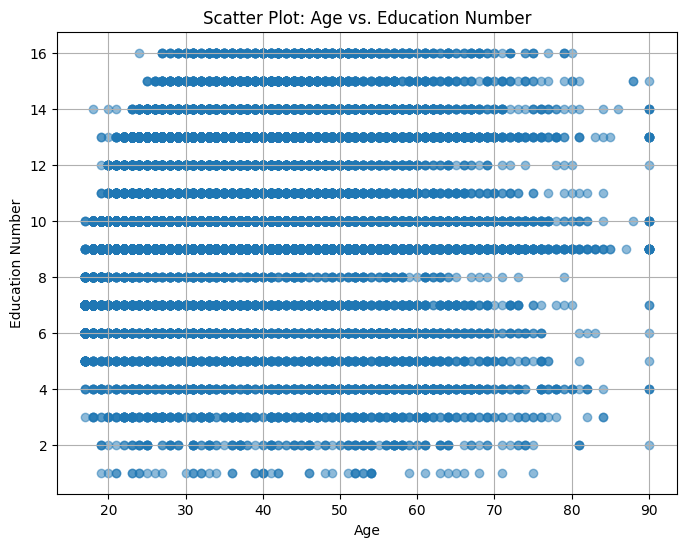

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Education Number'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Education Number')
plt.title('Scatter Plot: Age vs. Education Number')
plt.grid(True)
plt.show()

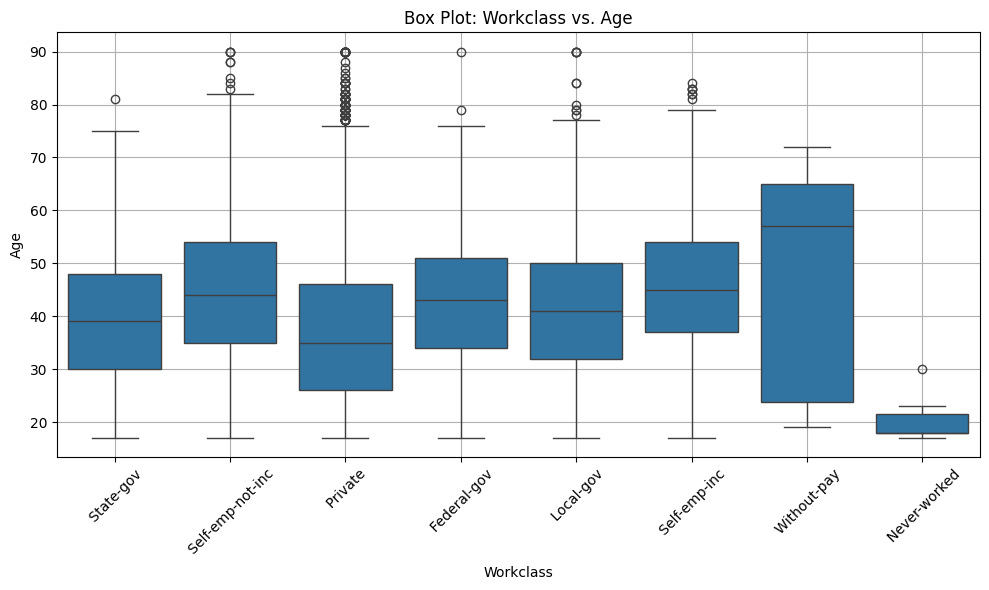

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workclass', y='Age', data=data)
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.title('Box Plot: Workclass vs. Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

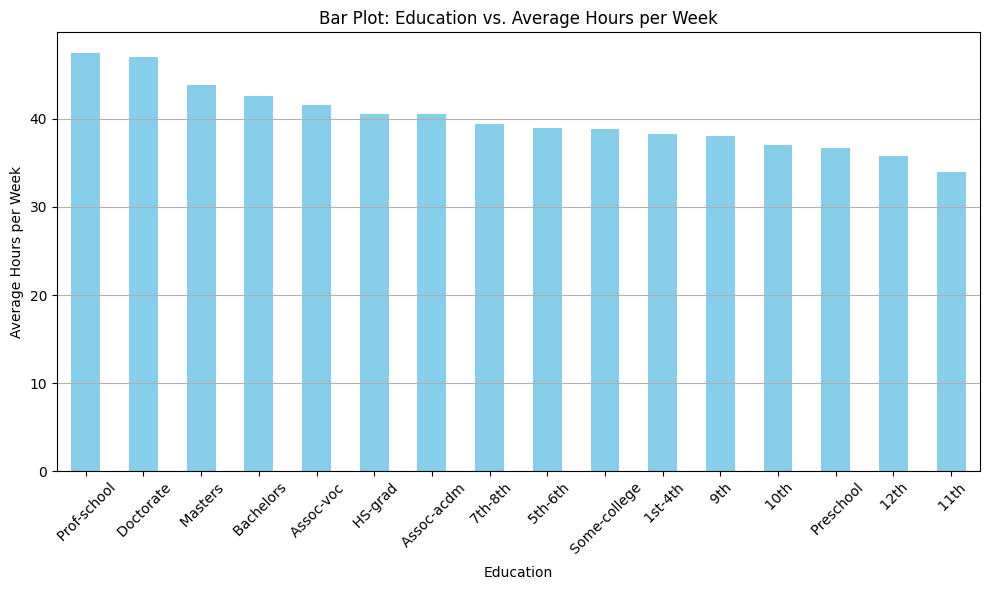

In [21]:
education_hours = data.groupby('Education')['Hours per Week'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
education_hours.plot(kind='bar', color='skyblue')
plt.xlabel('Education')
plt.ylabel('Average Hours per Week')
plt.title('Bar Plot: Education vs. Average Hours per Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

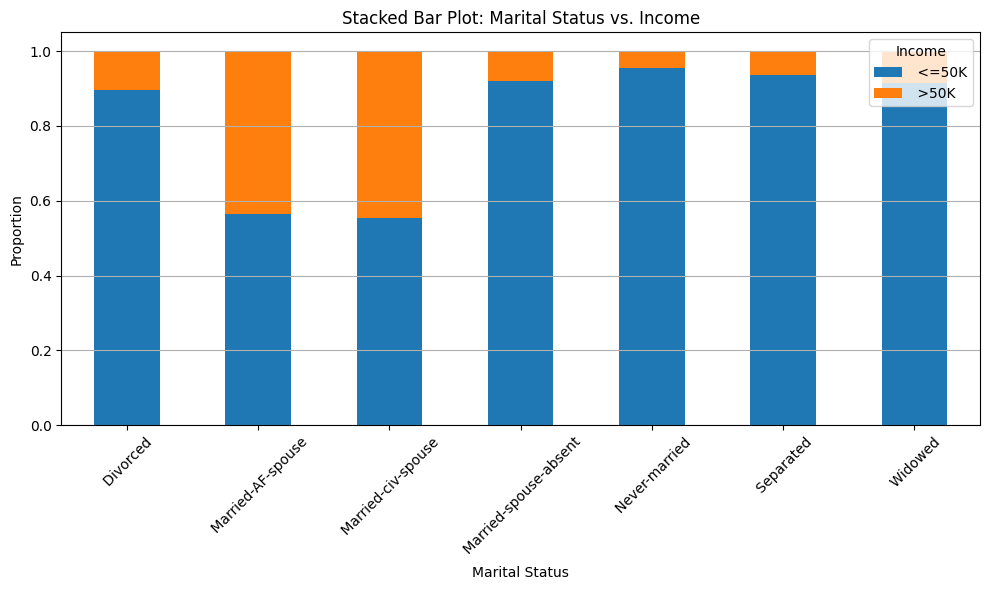

In [22]:
marital_income = data.groupby('Marital Status')['Income'].value_counts(normalize=True).unstack()
marital_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.title('Stacked Bar Plot: Marital Status vs. Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

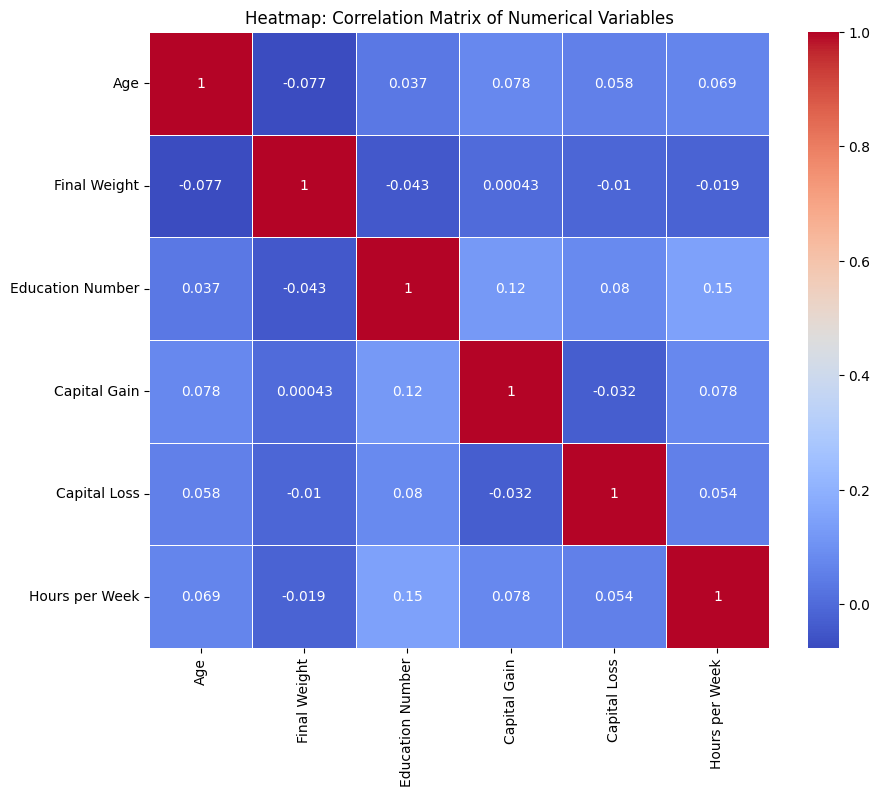

In [25]:
import seaborn as sns


# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']

# Calculate correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap: Correlation Matrix of Numerical Variables')
plt.show()

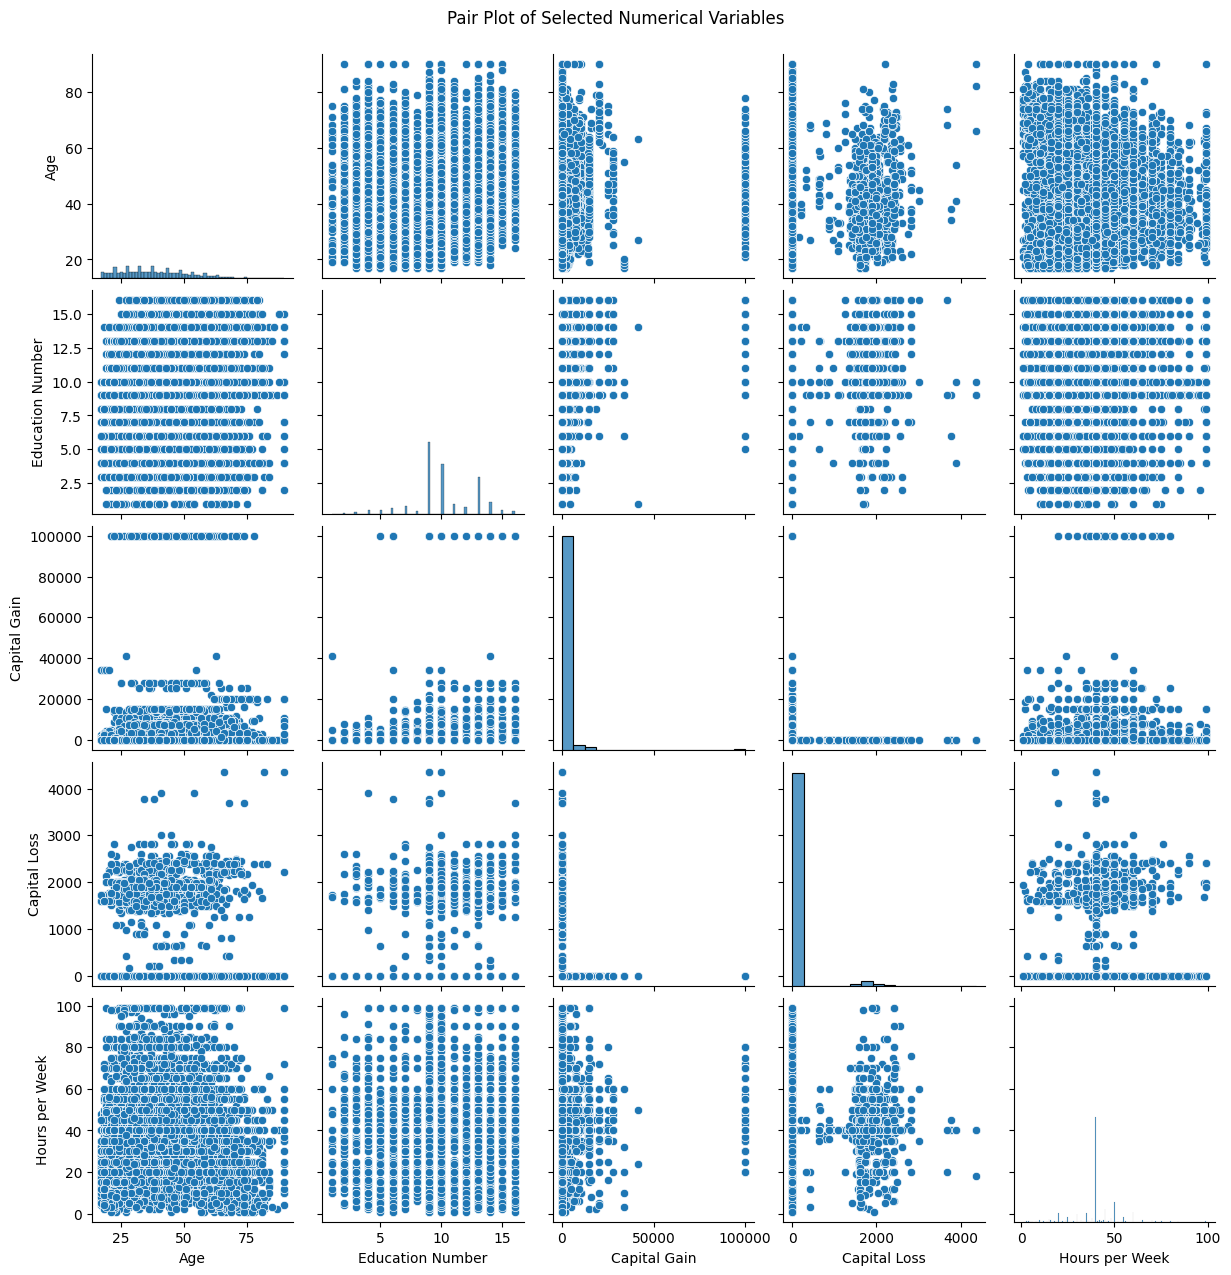

In [24]:
sns.pairplot(data[['Age', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']])
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

Multi-Variant Analysis

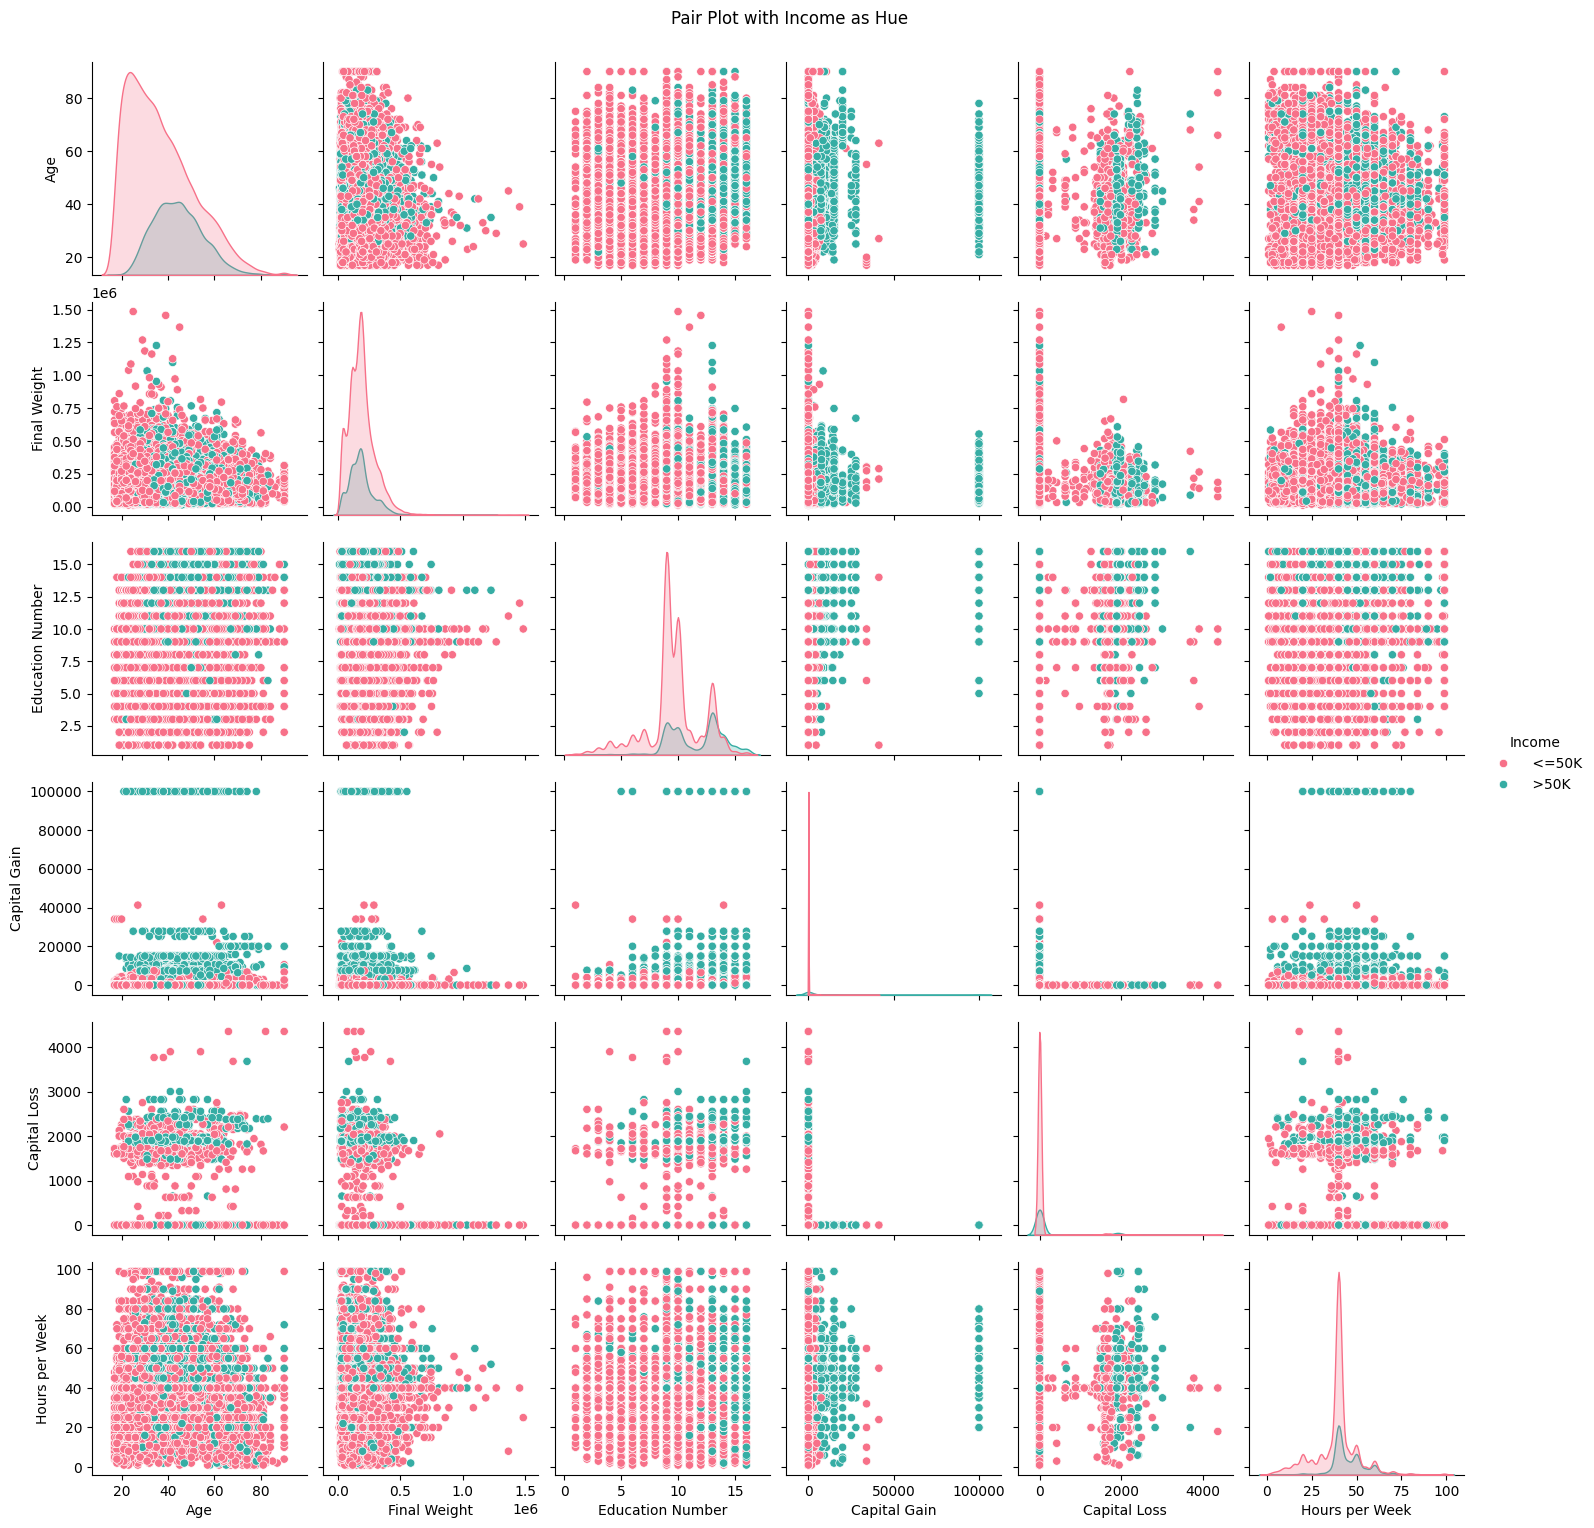

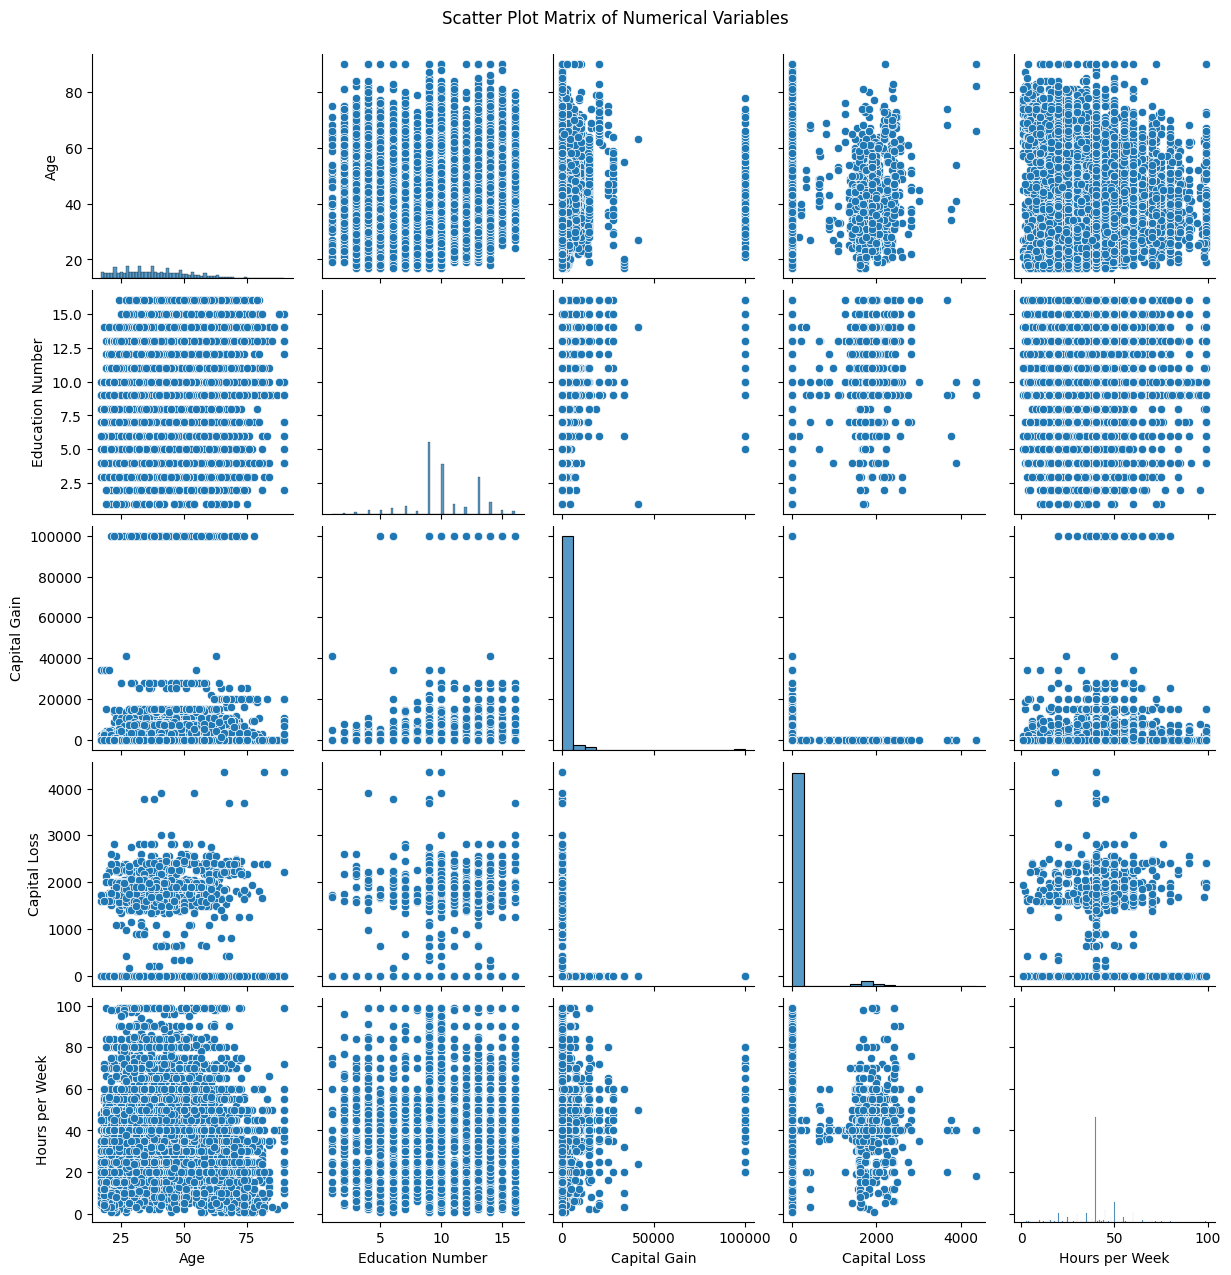

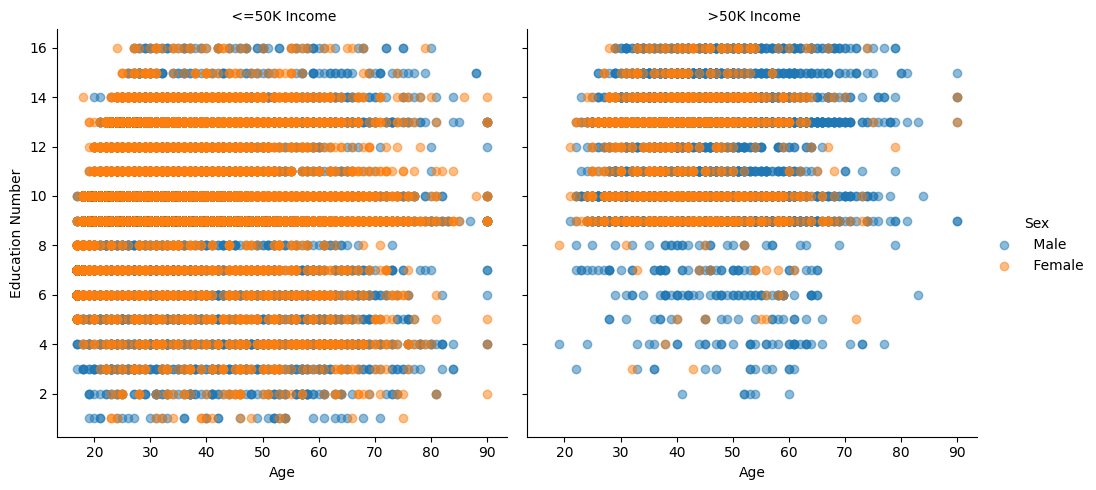

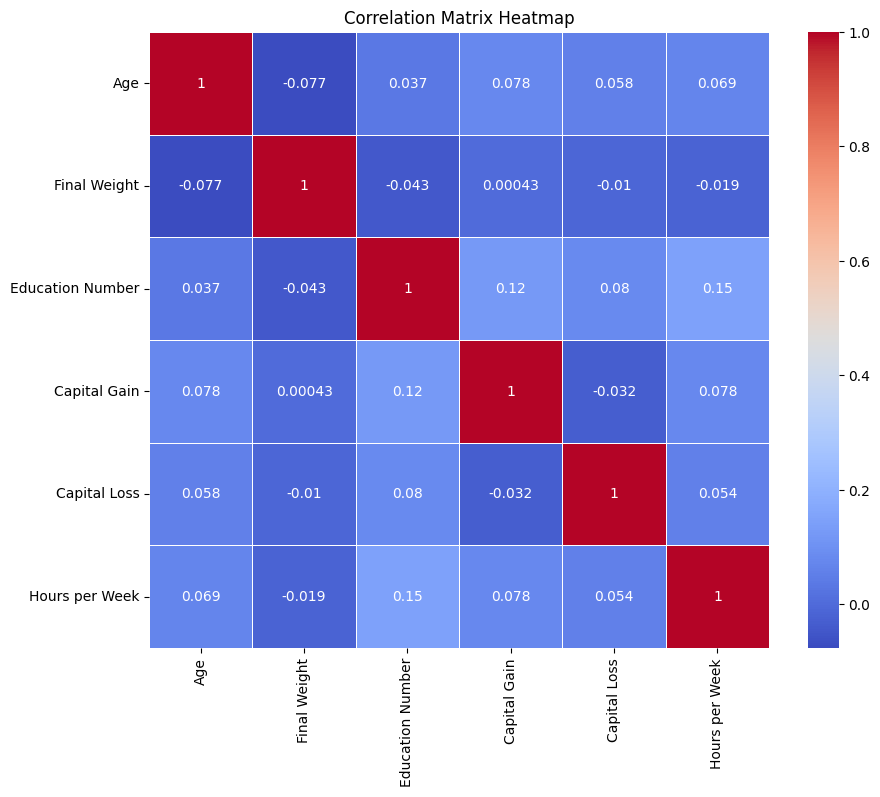

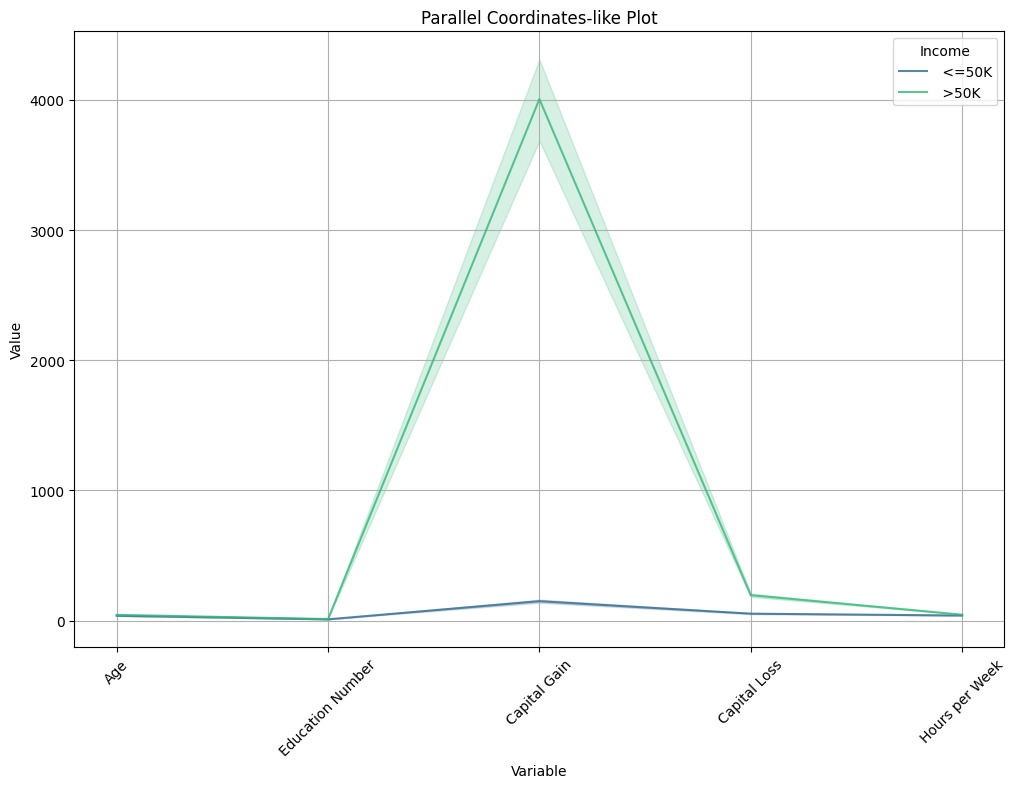

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset

# Pair plot with Income as hue
sns.pairplot(data, vars=['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week'], hue='Income', palette='husl')
plt.suptitle('Pair Plot with Income as Hue', y=1.02)
plt.show()

# Scatter plot matrix
sns.pairplot(data[['Age', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']], diag_kind='hist')
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

# Facet grid with Income vs. Age and Education Number
g = sns.FacetGrid(data, col='Income', hue='Sex', height=5)
g.map(plt.scatter, 'Age', 'Education Number', alpha=0.5)
g.add_legend()
g.set_titles(col_template="{col_name} Income")
plt.show()


# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']

# Calculate correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Parallel coordinates plot
# Subset of numerical columns for analysis
numerical_cols = ['Age', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']

# Select data and normalize if needed
data_subset = data[numerical_cols + ['Income']]

# Melt the data to long format for easier plotting
data_melted = data_subset.melt(id_vars=['Income'], var_name='Variable', value_name='Value')

# Plot using lineplot with hue='Income'
plt.figure(figsize=(12, 8))
sns.lineplot(x='Variable', y='Value', hue='Income', data=data_melted, palette='viridis', alpha=0.8)
plt.title('Parallel Coordinates-like Plot')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()